In [223]:
import numpy as np
import tensorflow as tf
#from nltk.tokenize import word_tokenize 


In [267]:
corpus_raw = 'Manchester United Football Club is a professional football club based in Old Trafford England. Liverpool Football Club is a professional football club in Liverpool, England, that competes in the Premier League, the top tier of English football.'
# convert to lower case
corpus_raw = corpus_raw.lower()
corpus_raw = corpus_raw.replace(",", "")
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word.replace(".", ""))
words = set(words) # so that all duplicate words are removed

# words = word_tokenize(corpus_raw)         
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print('Vocab size: ', vocab_size)
print('Words:', words)

Vocab size:  22
Words: {'old', 'of', 'english', 'top', 'manchester', 'professional', 'football', 'is', 'a', 'tier', 'league', 'in', 'that', 'competes', 'the', 'united', 'liverpool', 'trafford', 'based', 'england', 'club', 'premier'}


In [225]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
print('index of "manchester" is :',word2int['england'])
print('word in 1 index is :', int2word[1])

index of "manchester" is : 19
word in 1 index is : of


In [226]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []

print( 'Total number of sentenses are:', len(raw_sentences))
for i, sentence in enumerate(raw_sentences):
        sentences.append(sentence.split())
#        print(i , ':', sentence.split())

#using fixed window size, pairs of word are created for input
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
print('\n Original sentence:: ', corpus_raw)
print('\n ************************Input is getting prepared ***********************')  
for i, eachpair in enumerate(data):
    print(i, ':', eachpair)

Total number of sentenses are: 3

 Original sentence::  manchester united football club is a professional football club based in old trafford england. liverpool football club is a professional football club in liverpool england that competes in the premier league the top tier of english football.

 ************************Input is getting prepared ***********************
0 : ['manchester', 'united']
1 : ['manchester', 'football']
2 : ['united', 'manchester']
3 : ['united', 'football']
4 : ['united', 'club']
5 : ['football', 'manchester']
6 : ['football', 'united']
7 : ['football', 'club']
8 : ['football', 'is']
9 : ['club', 'united']
10 : ['club', 'football']
11 : ['club', 'is']
12 : ['club', 'a']
13 : ['is', 'football']
14 : ['is', 'club']
15 : ['is', 'a']
16 : ['is', 'professional']
17 : ['a', 'club']
18 : ['a', 'is']
19 : ['a', 'professional']
20 : ['a', 'football']
21 : ['professional', 'is']
22 : ['professional', 'a']
23 : ['professional', 'football']
24 : ['professional', 'club']

In [269]:
# #function to convert numbers to one hot vectors
# def to_one_hot(data_point_index, vocab_size):
#     temp = np.zeros(vocab_size)
#     temp[data_point_index] = 1
#     return temp

# x_train = [] # input word
# y_train = [] # output word

# for i, data_word in enumerate(data):
#     x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
#     y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# # convert them to numpy arrays
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# print('words: ', words)
# print('X : \n', x_train)
# print('\nY: \n', y_train)

KeyError: 'manchester'

In [244]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word
labelss = []
for i, data_word in enumerate(data):
    
    x_train.append((word2int[ data_word[0] ]))
    if data_word[0] not in labelss:
        labelss.append(data_word[0] )
    y_train.append((word2int[ data_word[1] ]))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print('words: ', words)
print('X : \n', x_train)
print('\nY: \n', y_train)

words:  {'old', 'of', 'english', 'top', 'manchester', 'professional', 'football', 'is', 'a', 'tier', 'league', 'in', 'that', 'competes', 'the', 'united', 'liverpool', 'trafford', 'based', 'england', 'club', 'premier'}
X : 
 [ 4  4 15 15 15  6  6  6  6 20 20 20 20  7  7  7  7  8  8  8  8  5  5  5
  5  6  6  6  6 20 20 20 20 18 18 18 18 11 11 11 11  0  0  0  0 17 17 17
 19 19 16 16  6  6  6 20 20 20 20  7  7  7  7  8  8  8  8  5  5  5  5  6
  6  6  6 20 20 20 20 11 11 11 11 16 16 16 16 19 19 19 19 12 12 12 12 13
 13 13 13 11 11 11 11 14 14 14 14 21 21 21 21 10 10 10 10 14 14 14 14  3
  3  3  3  9  9  9  9  1  1  1  1  2  2  2  6  6]

Y: 
 [15  6  4  6 20  4 15 20  7 15  6  7  8  6 20  8  5 20  7  5  6  7  8  6
 20  8  5 20 18  5  6 18 11  6 20 11  0 20 18  0 17 18 11 17 19 11  0 19
  0 17  6 20 16 20  7 16  6  7  8  6 20  8  5 20  7  5  6  7  8  6 20  8
  5 20 11  5  6 11 16  6 20 16 19 20 11 19 12 11 16 12 13 16 19 13 11 19
 12 11 14 12 13 14 21 13 11 21 10 11 14 10 14 14 21 14  3 21 10

In [229]:
#labelss

In [230]:
y_train = y_train.reshape((-1, 1))


In [231]:
#x_train, y_train


In [232]:
def get_batch(size):
    assert size<len(data)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(data)), size, replace=False)
    
    for r in rdm:
        X.append(word2int[data[r][0]])
        Y.append([word2int[data[r][1]]])
    return X, Y

print('Batches (x, y)', get_batch(3))

Batches (x, y) ([6, 8, 6], [[11], [5], [20]])


In [233]:
BATCH_SIZE = 10
VOCAB_SIZE = vocab_size #12
EMBED_SIZE = 5
NUM_SAMPLED= 6
LEARNING_RATE =1.0 # 1e-1
X = tf.placeholder(tf.int32, shape=[BATCH_SIZE])
Y = tf.placeholder(tf.int32, shape=[BATCH_SIZE, 1])

with tf.device("/cpu:0"):
    embed_matrix = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE], -1.0, 1.0)) #12,5 
    embed = tf.nn.embedding_lookup(embed_matrix, X) #50 , 3

In [234]:
#X.shape, Y.shape, embed_matrix.shape, embed.shape


In [235]:
# tf.nn.nce_loss(weights, biases, labels, inputs, num_sampled, num_classes, num_true=1,
# sampled_values=None, remove_accidental_hits=False, partition_strategy='mod',name='nce_loss')
nce_weight = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE],-1.0,1.0)) # (12, 5)
nce_bias = tf.Variable(tf.zeros([VOCAB_SIZE]))#12

In [236]:
#nce_weight, nce_bias


In [260]:
loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight,
                                     biases=nce_bias,
                                     labels=Y,
                                     inputs=embed,
                                     num_sampled=NUM_SAMPLED,
                                     num_classes=VOCAB_SIZE
                                    ))
#print (loss)


In [261]:
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)


In [262]:
epochs = 10000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range (epochs):
        batch_inputs, batch_labels = get_batch(BATCH_SIZE)
        _,loss_val = sess.run([optimizer,loss],feed_dict={X: batch_inputs, Y: batch_labels})
    
        if epoch % 1000 == 0:
            print("Loss at", epoch, loss_val )
        
    temp = embed_matrix.eval()
# words

Loss at 0 8.878108
Loss at 1000 2.1282516
Loss at 2000 1.3175844
Loss at 3000 2.2427027
Loss at 4000 1.2110066
Loss at 5000 1.5972496
Loss at 6000 2.8704581
Loss at 7000 2.8053105
Loss at 8000 2.0491073
Loss at 9000 1.7230179


In [271]:
temp

array([[ 0.6944479 , -0.25988418, -0.6709179 ,  1.0951345 ,  0.9476659 ],
       [-0.83016324, -0.19688472,  2.0873039 , -1.7829826 , -0.06266162],
       [ 1.0977699 , -0.141658  ,  1.4091423 , -2.64497   ,  0.5532724 ],
       [-0.22961949, -0.9885367 ,  0.91091657, -0.755999  ,  1.8764786 ],
       [ 2.0185442 ,  1.2253134 ,  0.1301832 , -1.807558  , -0.11586981],
       [-1.1000371 ,  0.54688513, -0.01973297, -1.0040284 , -1.1031016 ],
       [ 0.56303626, -1.8714243 , -0.29543772, -0.53828394, -0.6383572 ],
       [-0.13107562, -0.05864046,  0.48632798, -0.22897488, -0.99308646],
       [-0.12486245, -0.33267194, -0.4034236 , -0.74628454, -1.0242493 ],
       [-0.7966839 , -1.5956622 ,  1.3138496 , -0.883736  ,  0.40056163],
       [-1.8473268 , -0.7873239 ,  0.9229829 , -0.29741883,  1.1911665 ],
       [-0.6692132 , -0.56363994, -0.24505115,  0.77865577, -0.02694191],
       [ 0.96776   , -0.07424176,  0.424195  ,  0.979758  ,  0.7956037 ],
       [ 0.41498128, -0.24653174, -1.3

In [263]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
trained_embeedings = pca.fit_transform(temp)

In [264]:
trained_embeedings

array([[-1.5520433 , -0.6990878 ],
       [ 2.5119753 ,  0.10410953],
       [ 1.8522092 ,  1.3372521 ],
       [ 0.78593045, -1.1874233 ],
       [-0.00537155,  2.5185468 ],
       [ 0.81831336,  0.8820145 ],
       [ 0.63966703,  0.02931802],
       [ 0.60480636,  0.3896371 ],
       [ 0.44223282,  0.7894859 ],
       [ 1.8720802 , -1.0829864 ],
       [ 1.0956815 , -1.740187  ],
       [-0.35508478, -0.9126523 ],
       [-0.89743704, -0.6277718 ],
       [-1.6190529 , -0.6100271 ],
       [ 0.7840615 , -1.7202698 ],
       [ 0.6591576 ,  1.12912   ],
       [-1.4080267 ,  0.16863525],
       [-2.1986866 , -0.02471079],
       [-1.6216176 ,  0.92647344],
       [-0.91669124, -0.17399745],
       [-0.4759838 ,  0.9261311 ],
       [-1.0161183 , -0.42160872]], dtype=float32)

In [270]:
labelss

['manchester',
 'united',
 'football',
 'club',
 'is',
 'a',
 'professional',
 'based',
 'in',
 'old',
 'trafford',
 'england',
 'liverpool',
 'that',
 'competes',
 'the',
 'premier',
 'league',
 'top',
 'tier',
 'of',
 'english']

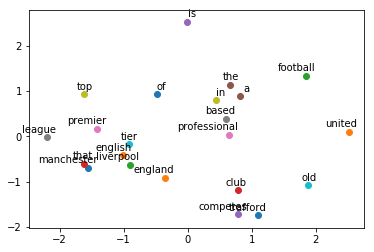

In [266]:
import matplotlib.pyplot as plt
#show word2vec if dim is 2
if trained_embeedings.shape[1] == 2:
    #labels = data[:10] #Show top 10 words
#     plt.xlim(-2.5, 2.4)
#     plt.ylim(-2.0, 2.2)
    for i, label in enumerate(labelss):
        x,y = trained_embeedings[i,:]
        plt.scatter(x,y)
        plt.annotate(label, xy=(x,y), xytext=(9,3),textcoords='offset points', ha='right', va='bottom')
        #plt.savefig('word2vev.png')
    plt.show()